# Evaluation of the system with the top ids already generated

- Lyrics Features used
    - tfidf
    - word2vec
    - bert

- Audio Features used
    - mfcc bow
    - mfcc stats
    - essentia
    - blf delta spectral
    - blf correlation
    - blf logfluc
    - blf spectral
    - blf spectral contrast
    - blf var delta spectral
    
-  Video Features used
    - incp
    - vgg19
    - *resnet*

- Combinations of [Lyrics][Audio][Video] *(Not evaluated for Task2)*

    - tfidf-mfccbow-incp
    - bert-mfccbow-incp

    - tfidf_essentia_incp
    - bert-essentia-incp

    - tfidf-blfdeltaspectral-incp
    - bert-blfdeltaspectral-incp

    - tfidf-mfccbow-vgg19
    - bert-mfccbow-vgg19

    - tfidf_essentia_vgg19
    - bert-essentia-vgg19

    - tfidf-blfdeltaspectral-vgg19
    - bert-blfdeltaspectral-vgg19

In [1]:
import pandas as pd
import numpy as np
from os.path import exists
from tqdm import tqdm
import re
import datatable as dt
from matplotlib import pyplot as plt
import scipy.stats as stats
# Variables and functiones own defined
from files import *
from functions import get_genres, isResultRelevant

In [2]:
genres  = dt.fread(file_genres_2).to_pandas()
genres.set_index('id', inplace=True)

In [3]:
# Not neccessary now
# info  = dt.fread(file_info_2).to_pandas()
# info.set_index('id', inplace=True)

In [4]:
top_baseline  = dt.fread(f_top_baseline, header=True).to_pandas()
top_baseline.set_index('index', inplace=True)

In [5]:
# Lyrics
top_cosine_tfidf  = dt.fread(f_top_cosine_tfidf, header=True).to_pandas()
top_cosine_tfidf.set_index('index', inplace=True)
top_cosine_word2vec  = dt.fread(f_top_cosine_word2vec, header=True).to_pandas()
top_cosine_word2vec.set_index('index', inplace=True)
top_cosine_bert  = dt.fread(f_top_cosine_bert, header=True).to_pandas()
top_cosine_bert.set_index('index', inplace=True)

In [6]:
# Audio
top_cosine_mfcc_bow  = dt.fread(f_top_cosine_mfcc_bow, header=True).to_pandas()
top_cosine_mfcc_bow.set_index('index', inplace=True)
top_cosine_mfcc_stats  = dt.fread(f_top_cosine_mfcc_stats, header=True).to_pandas()
top_cosine_mfcc_stats.set_index('index', inplace=True)
top_cosine_essentia  = dt.fread(f_top_cosine_essentia, header=True).to_pandas()
top_cosine_essentia.set_index('index', inplace=True)
top_cosine_blf_delta_spectral  = dt.fread(f_top_cosine_blf_delta_spectral, header=True).to_pandas()
top_cosine_blf_delta_spectral.set_index('index', inplace=True)
top_cosine_blf_correlation  = dt.fread(f_top_cosine_blf_correlation, header=True).to_pandas()
top_cosine_blf_correlation.set_index('index', inplace=True)
top_cosine_blf_logfluc  = dt.fread(f_top_cosine_blf_logfluc, header=True).to_pandas()
top_cosine_blf_logfluc.set_index('index', inplace=True)
top_cosine_blf_spectral  = dt.fread(f_top_cosine_blf_spectral, header=True).to_pandas()
top_cosine_blf_spectral.set_index('index', inplace=True)
top_cosine_blf_spectral_contrast  = dt.fread(f_top_cosine_blf_spectral_contrast, header=True).to_pandas()
top_cosine_blf_spectral_contrast.set_index('index', inplace=True)
top_cosine_blf_vardelta_spectral  = dt.fread(f_top_cosine_blf_vardelta_spectral, header=True).to_pandas()
top_cosine_blf_vardelta_spectral.set_index('index', inplace=True)

In [7]:
# Video
top_cosine_incp  = dt.fread(f_top_cosine_incp, header=True).to_pandas()
top_cosine_incp.set_index('index', inplace=True)
top_cosine_vgg19  = dt.fread(f_top_cosine_vgg19, header=True).to_pandas()
top_cosine_vgg19.set_index('index', inplace=True)
top_cosine_resnet  = dt.fread(f_top_cosine_resnet, header=True).to_pandas()
top_cosine_resnet.set_index('index', inplace=True)

In [8]:
# Lyrics
top_jaccard_tfidf  = dt.fread(f_top_jaccard_tfidf, header=True).to_pandas()
top_jaccard_tfidf.set_index('index', inplace=True)
top_jaccard_word2vec  = dt.fread(f_top_jaccard_word2vec, header=True).to_pandas()
top_jaccard_word2vec.set_index('index', inplace=True)
top_jaccard_bert  = dt.fread(f_top_jaccard_bert, header=True).to_pandas()
top_jaccard_bert.set_index('index', inplace=True)

In [9]:
# Audio
top_jaccard_mfcc_bow  = dt.fread(f_top_jaccard_mfcc_bow, header=True).to_pandas()
top_jaccard_mfcc_bow.set_index('index', inplace=True)
top_jaccard_mfcc_stats  = dt.fread(f_top_jaccard_mfcc_stats, header=True).to_pandas()
top_jaccard_mfcc_stats.set_index('index', inplace=True)
top_jaccard_essentia  = dt.fread(f_top_jaccard_essentia, header=True).to_pandas()
top_jaccard_essentia.set_index('index', inplace=True)
top_jaccard_blf_delta_spectral  = dt.fread(f_top_jaccard_blf_delta_spectral, header=True).to_pandas()
top_jaccard_blf_delta_spectral.set_index('index', inplace=True)
top_jaccard_blf_correlation  = dt.fread(f_top_jaccard_blf_correlation, header=True).to_pandas()
top_jaccard_blf_correlation.set_index('index', inplace=True)
top_jaccard_blf_logfluc  = dt.fread(f_top_jaccard_blf_logfluc, header=True).to_pandas()
top_jaccard_blf_logfluc.set_index('index', inplace=True)
top_jaccard_blf_spectral  = dt.fread(f_top_jaccard_blf_spectral, header=True).to_pandas()
top_jaccard_blf_spectral.set_index('index', inplace=True)
top_jaccard_blf_spectral_contrast  = dt.fread(f_top_jaccard_blf_spectral_contrast, header=True).to_pandas()
top_jaccard_blf_spectral_contrast.set_index('index', inplace=True)
top_jaccard_blf_vardelta_spectral  = dt.fread(f_top_jaccard_blf_vardelta_spectral, header=True).to_pandas()
top_jaccard_blf_vardelta_spectral.set_index('index', inplace=True)

In [10]:
# Video
top_jaccard_incp  = dt.fread(f_top_jaccard_incp, header=True).to_pandas()
top_jaccard_incp.set_index('index', inplace=True)
top_jaccard_vgg19  = dt.fread(f_top_jaccard_vgg19, header=True).to_pandas()
top_jaccard_vgg19.set_index('index', inplace=True)
top_jaccard_resnet  = dt.fread(f_top_jaccard_resnet, header=True).to_pandas()
top_jaccard_resnet.set_index('index', inplace=True)

In [11]:
# top_cosine_tfidf_mfcc_bow_incp  = dt.fread(f_top_cosine_tfidf_mfcc_bow_incp, header=True).to_pandas()
# top_cosine_tfidf_mfcc_bow_incp.set_index('index', inplace=True)
# top_cosine_tfidf_mfcc_bow_vgg19  = dt.fread(f_top_cosine_tfidf_mfcc_bow_vgg19, header=True).to_pandas()
# top_cosine_tfidf_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_cosine_tfidf_essentia_incp  = dt.fread(f_top_cosine_tfidf_essentia_incp, header=True).to_pandas()
# top_cosine_tfidf_essentia_incp.set_index('index', inplace=True)
# top_cosine_tfidf_essentia_vgg19  = dt.fread(f_top_cosine_tfidf_essentia_vgg19, header=True).to_pandas()
# top_cosine_tfidf_essentia_vgg19.set_index('index', inplace=True)
# top_cosine_tfidf_blf_delta_spectral_incp  = dt.fread(f_top_cosine_tfidf_blf_delta_spectral_incp, header=True).to_pandas()
# top_cosine_tfidf_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_cosine_tfidf_blf_delta_spectral_vgg19  = dt.fread(f_top_cosine_tfidf_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_cosine_tfidf_blf_delta_spectral_vgg19.set_index('index', inplace=True)
# top_cosine_bert_mfcc_bow_incp  = dt.fread(f_top_cosine_bert_mfcc_bow_incp, header=True).to_pandas()
# top_cosine_bert_mfcc_bow_incp.set_index('index', inplace=True)
# top_cosine_bert_mfcc_bow_vgg19  = dt.fread(f_top_cosine_bert_mfcc_bow_vgg19, header=True).to_pandas()
# top_cosine_bert_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_cosine_bert_essentia_incp  = dt.fread(f_top_cosine_bert_essentia_incp, header=True).to_pandas()
# top_cosine_bert_essentia_incp.set_index('index', inplace=True)
# top_cosine_bert_essentia_vgg19  = dt.fread(f_top_cosine_bert_essentia_vgg19, header=True).to_pandas()
# top_cosine_bert_essentia_vgg19.set_index('index', inplace=True)
# top_cosine_bert_blf_delta_spectral_incp  = dt.fread(f_top_cosine_bert_blf_delta_spectral_incp, header=True).to_pandas()
# top_cosine_bert_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_cosine_bert_blf_delta_spectral_vgg19  = dt.fread(f_top_cosine_bert_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_cosine_bert_blf_delta_spectral_vgg19.set_index('index', inplace=True)

In [12]:
# top_jaccard_tfidf_mfcc_bow_incp  = dt.fread(f_top_jaccard_tfidf_mfcc_bow_incp, header=True).to_pandas()
# top_jaccard_tfidf_mfcc_bow_incp.set_index('index', inplace=True)
# top_jaccard_tfidf_mfcc_bow_vgg19  = dt.fread(f_top_jaccard_tfidf_mfcc_bow_vgg19, header=True).to_pandas()
# top_jaccard_tfidf_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_jaccard_tfidf_essentia_incp  = dt.fread(f_top_jaccard_tfidf_essentia_incp, header=True).to_pandas()
# top_jaccard_tfidf_essentia_incp.set_index('index', inplace=True)
# top_jaccard_tfidf_essentia_vgg19  = dt.fread(f_top_jaccard_tfidf_essentia_vgg19, header=True).to_pandas()
# top_jaccard_tfidf_essentia_vgg19.set_index('index', inplace=True)
# top_jaccard_tfidf_blf_delta_spectral_incp  = dt.fread(f_top_jaccard_tfidf_blf_delta_spectral_incp, header=True).to_pandas()
# top_jaccard_tfidf_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_jaccard_tfidf_blf_delta_spectral_vgg19  = dt.fread(f_top_jaccard_tfidf_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_jaccard_tfidf_blf_delta_spectral_vgg19.set_index('index', inplace=True)
# top_jaccard_bert_mfcc_bow_incp  = dt.fread(f_top_jaccard_bert_mfcc_bow_incp, header=True).to_pandas()
# top_jaccard_bert_mfcc_bow_incp.set_index('index', inplace=True)
# top_jaccard_bert_mfcc_bow_vgg19  = dt.fread(f_top_jaccard_bert_mfcc_bow_vgg19, header=True).to_pandas()
# top_jaccard_bert_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_jaccard_bert_essentia_incp  = dt.fread(f_top_jaccard_bert_essentia_incp, header=True).to_pandas()
# top_jaccard_bert_essentia_incp.set_index('index', inplace=True)
# top_jaccard_bert_essentia_vgg19  = dt.fread(f_top_jaccard_bert_essentia_vgg19, header=True).to_pandas()
# top_jaccard_bert_essentia_vgg19.set_index('index', inplace=True)
# top_jaccard_bert_blf_delta_spectral_incp  = dt.fread(f_top_jaccard_bert_blf_delta_spectral_incp, header=True).to_pandas()
# top_jaccard_bert_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_jaccard_bert_blf_delta_spectral_vgg19  = dt.fread(f_top_jaccard_bert_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_jaccard_bert_blf_delta_spectral_vgg19.set_index('index', inplace=True)

In [13]:
cosine_df = {
    "baseline" : top_baseline,
    "tfidf" : top_cosine_tfidf,
    "word2vec" : top_cosine_word2vec,
    "bert" : top_cosine_bert,
    "mfcc_bow" : top_cosine_mfcc_bow,
    "mfcc_stats" : top_cosine_mfcc_stats,
    "essentia" : top_cosine_essentia,
    "blf_delta_spectral" : top_cosine_blf_delta_spectral,
    "blf_correlation" : top_cosine_blf_correlation,
    "blf_logfluc" : top_cosine_blf_logfluc,
    "blf_spectral" : top_cosine_blf_spectral,
    "blf_spectral_contrast" : top_cosine_blf_spectral_contrast,
    "blf_vardelta_spectral" : top_cosine_blf_vardelta_spectral,
    "incp" : top_cosine_incp,
    "vgg19" : top_cosine_vgg19,
    "resnet" : top_cosine_resnet
}

In [14]:
jaccard_df = {
    "baseline" : top_baseline,
    "tfidf" : top_jaccard_tfidf,
    "word2vec" : top_jaccard_word2vec,
    "bert" : top_jaccard_bert,
    "mfcc_bow" : top_jaccard_mfcc_bow,
    "mfcc_stats" : top_jaccard_mfcc_stats,
    "essentia" : top_jaccard_essentia,
    "blf_delta_spectral" : top_jaccard_blf_delta_spectral,
    "blf_correlation" : top_jaccard_blf_correlation,
    "blf_logfluc" : top_jaccard_blf_logfluc,
    "blf_spectral" : top_jaccard_blf_spectral,
    "blf_spectral_contrast" : top_jaccard_blf_spectral_contrast,
    "blf_vardelta_spectral" : top_jaccard_blf_vardelta_spectral,
    "incp" : top_jaccard_incp,
    "vgg19" : top_jaccard_vgg19,
    "resnet" : top_jaccard_resnet
}

## Evaluation metrics

Gain for the user is considered with the genre, if the song retrieved contains the genre the gain will be 1, 
if not 0.

For example:
Given the array of results marked as relevant  `[1, 0, 0, 1, 1` for @k = @5
For the first consideration the user gain will be the same d1(1), d2(0), d3(0), d4(1), d5(1)


In [15]:
def ndcgMean(dfTopIds, topNumber):
    ndcg = []

    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        sorted_results = sorted(relevant_results, reverse=True)
        
        dcg =[ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)]
        idcg =[ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(sorted_results)]
        
        if idcg == 0: # Case when there is no relevant result in the top@K
            ndcg.append(0)
        else:
            ndcg.append(np.sum(dcg) / np.sum(idcg))
#         print(dcg, idcg)
    return (ndcg, np.mean(ndcg))

In [16]:
def meanReciprocalRank(dfTopIds, topNumber):
    RR = []
    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]

        if True in relevant_results:
            min_idx_rel = relevant_results.index(True) + 1
            RR.append(1/min_idx_rel)
        else: # Case when there is no relevant result in the top@K
            RR.append(0)

       
    return np.mean(RR)

In [17]:
def meanAveragePrecision(dfTopIds, topNumber):
    
    AP_ = []
    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        REL = np.sum(relevant_results)
        if REL == 0: # Case when there is no relevant result in the top@K
            AP = 0
        else:
#             AP = (1/REL) * np.sum([relevant_results[i] * (np.sum(relevant_results[:i+1]) / (i+1)) for i in range(topNumber)])
            AP = (1/REL) * np.sum(np.multiply(relevant_results, np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))))
        
        
        AP_.append(AP)
        
    return np.mean(AP_)

In [18]:
def getMetrics(dfTopIds, topNumber):

    RR = []
    AP_ = []
    ndcg = []

    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        sorted_results = sorted(relevant_results, reverse=True)

        # MAP
        REL = np.sum(relevant_results)
        if REL == 0: # Case when there is no relevant result in the top@K
            AP = 0
        else:
            AP = (1/REL) * np.sum(np.multiply(relevant_results, np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))))
        AP_.append(AP)

        # MRR
        if True in relevant_results:
            min_idx_rel = relevant_results.index(True) + 1
            RR.append(1/min_idx_rel)
        else: # Case when there is no relevant result in the top@K
            RR.append(0)

        # NDCG
        dcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        # print([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        idcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(sorted_results)])
        if idcg == 0: # Case when there is no relevant result in the top@K
            ndcg.append(0)
        else:
            ndcg.append(dcg / idcg)
    return (np.mean(AP_), np.mean(RR), np.mean(ndcg))

In [19]:
_, mean_ndcg = ndcgMean(top_cosine_tfidf.iloc[:200], 100)
mean_ndcg

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 363.32it/s]


0.7692370066424492

In [20]:
MRR = meanReciprocalRank(top_cosine_tfidf.iloc[:200], 100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 479.82it/s]


In [21]:
MAP = meanAveragePrecision(top_cosine_tfidf.iloc[:200], 100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 465.64it/s]


In [22]:
print("Individual Results", MAP, MRR, mean_ndcg)

Individual Results 0.5444188945766615 0.7051201365243449 0.7692370066424492


In [23]:
print("Single function", getMetrics(top_cosine_tfidf.iloc[:200], 100))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 371.35it/s]

Single function (0.5444188945766615, 0.7051201365243449, 0.7692370066424492)


## Evaluation of datasets with MAP, MRR and Mean NDCG at top 100 cosine and jaccard

In [24]:
if exists(file_metrics_jaccard):
    metrics_jaccard = pd.read_csv(file_metrics_jaccard, index_col=0)
else:
    
    i = 0
    jaccard_MAP_100 = np.zeros((len(jaccard_df.items())))
    jaccard_MRR_100 = np.zeros((len(jaccard_df.items())))
    jaccard_MeanNDCG_100 = np.zeros((len(jaccard_df.items())))

    for value in jaccard_df.values():
        jaccard_MAP_100[i], jaccard_MRR_100[i], jaccard_MeanNDCG_100[i] = getMetrics(value, 100)
        i += 1  
        
    i = 0
    jaccard_MAP_10 = np.zeros((len(jaccard_df.items())))
    jaccard_MRR_10 = np.zeros((len(jaccard_df.items())))
    jaccard_MeanNDCG_10 = np.zeros((len(jaccard_df.items())))

    for value in jaccard_df.values():
        jaccard_MAP_10[i], jaccard_MRR_10[i], jaccard_MeanNDCG_10[i] = getMetrics(value, 10)
        i += 1 
    
    metrics_jaccard =pd.DataFrame(
        np.column_stack((jaccard_MAP_10,jaccard_MAP_100, jaccard_MRR_10,jaccard_MRR_100, jaccard_MeanNDCG_10,jaccard_MeanNDCG_100)), 
        index=jaccard_df.keys(), 
        columns=['MAP_10','MAP_100','MRR_10','MRR_100','Mean NDCG_10','Mean NDCG_100'])
    metrics_jaccard.to_csv(file_metrics_jaccard)

In [25]:
metrics_jaccard

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511
word2vec,0.595455,0.528458,0.654077,0.658399,0.691671,0.738485
bert,0.635672,0.555337,0.701501,0.704617,0.730580,0.768298
mfcc_bow,0.587747,0.517094,0.655531,0.660159,0.690866,0.742419
mfcc_stats,0.816116,0.487810,1.000000,1.000000,0.872848,0.757469
essentia,0.859410,0.564858,1.000000,1.000000,0.900627,0.806830
blf_delta_spectral,0.550818,0.342966,0.677026,0.683731,0.654726,0.617797
blf_correlation,0.519026,0.446352,0.576503,0.581919,0.627646,0.687641
blf_logfluc,0.776459,0.473369,0.845938,0.845938,0.931068,0.789124


In [26]:
if exists(file_metrics_cosine):
    metrics_cosine = pd.read_csv(file_metrics_cosine, index_col=0)
else:
    
    i = 0
    cosine_MAP_10 = np.zeros((len(cosine_df.items())))
    cosine_MRR_10 = np.zeros((len(cosine_df.items())))
    cosine_MeanNDCG_10 = np.zeros((len(cosine_df.items())))

    for value in cosine_df.values():
        cosine_MAP_10[i], cosine_MRR_10[i], cosine_MeanNDCG_10[i] = getMetrics(value, 10)
        i += 1  
        
    i = 0
    cosine_MAP_100 = np.zeros((len(cosine_df.items())))
    cosine_MRR_100 = np.zeros((len(cosine_df.items())))
    cosine_MeanNDCG_100 = np.zeros((len(cosine_df.items())))

    for value in cosine_df.values():
        cosine_MAP_100[i], cosine_MRR_100[i], cosine_MeanNDCG_100[i] = getMetrics(value, 100)
        i += 1  
    
    metrics_cosine =pd.DataFrame(
        np.column_stack((cosine_MAP_10,cosine_MAP_100, cosine_MRR_10,cosine_MRR_100, cosine_MeanNDCG_10,cosine_MeanNDCG_100)), 
        index=cosine_df.keys(), 
        columns=['MAP_10','MAP_100','MRR_10','MRR_100','Mean NDCG_10','Mean NDCG_100'])
    metrics_cosine.to_csv(file_metrics_cosine)

In [27]:
metrics_cosine

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100
baseline,0.538928,0.468788,0.598932,0.603907,0.647442,0.702656
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511
word2vec,0.620400,0.531775,0.688450,0.691843,0.716072,0.752696
bert,0.662672,0.582196,0.724919,0.727862,0.749986,0.782546
mfcc_bow,0.686824,0.611884,0.745530,0.748228,0.769581,0.799817
mfcc_stats,0.664766,0.590064,0.723618,0.726565,0.751656,0.784836
essentia,0.589838,0.518657,0.652015,0.655964,0.690800,0.738632
blf_delta_spectral,0.660291,0.580011,0.724746,0.727659,0.749790,0.782696
blf_correlation,0.659301,0.576152,0.721618,0.724617,0.748001,0.779366
blf_logfluc,0.684362,0.606019,0.743900,0.746621,0.767867,0.796682


In [28]:
def Precision(dfTopIds, topNumber, returnMeanOfValues):
    
    precision = np.zeros((dfTopIds.shape[0], topNumber))
    recall = np.zeros((dfTopIds.shape[0], topNumber))
    precision_max = np.zeros((dfTopIds.shape[0], topNumber))
    
    for idx,queryId in tqdm(enumerate(dfTopIds.index.values)):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        REL = np.sum(relevant_results)

        if REL != 0: # Case when there is no relevant result in the top@K
#             P[idx] = [(np.sum(relevant_results[:i+1]) / (i+1)) for i in range(topNumber)]
            precision[idx] = np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))
#             R[idx] = [(np.sum(relevant_results[:i+1]) / (REL)) for i in range(topNumber)]
            recall[idx] = np.divide(np.cumsum(relevant_results,axis=0), REL)
            precision_max[idx] = [ np.max(precision[idx,i:]) for i,val in enumerate(precision[idx])]

#     return precision, recall, precision_max
    if returnMeanOfValues:
        return np.mean(precision, axis=0), np.mean(recall, axis=0), np.mean(precision_max, axis=0)
    return precision, recall, precision_max

In [29]:
# # Examples of execution as single function
p, r, p_max = Precision(top_cosine_tfidf, 100, False)
p1, r1, p1_max = Precision(top_cosine_word2vec, 100, False)
p2, r2, p2_max = Precision(top_cosine_mfcc_bow, 100, False)

68641it [02:45, 414.21it/s]
68641it [02:41, 424.11it/s]
68641it [02:32, 451.58it/s]


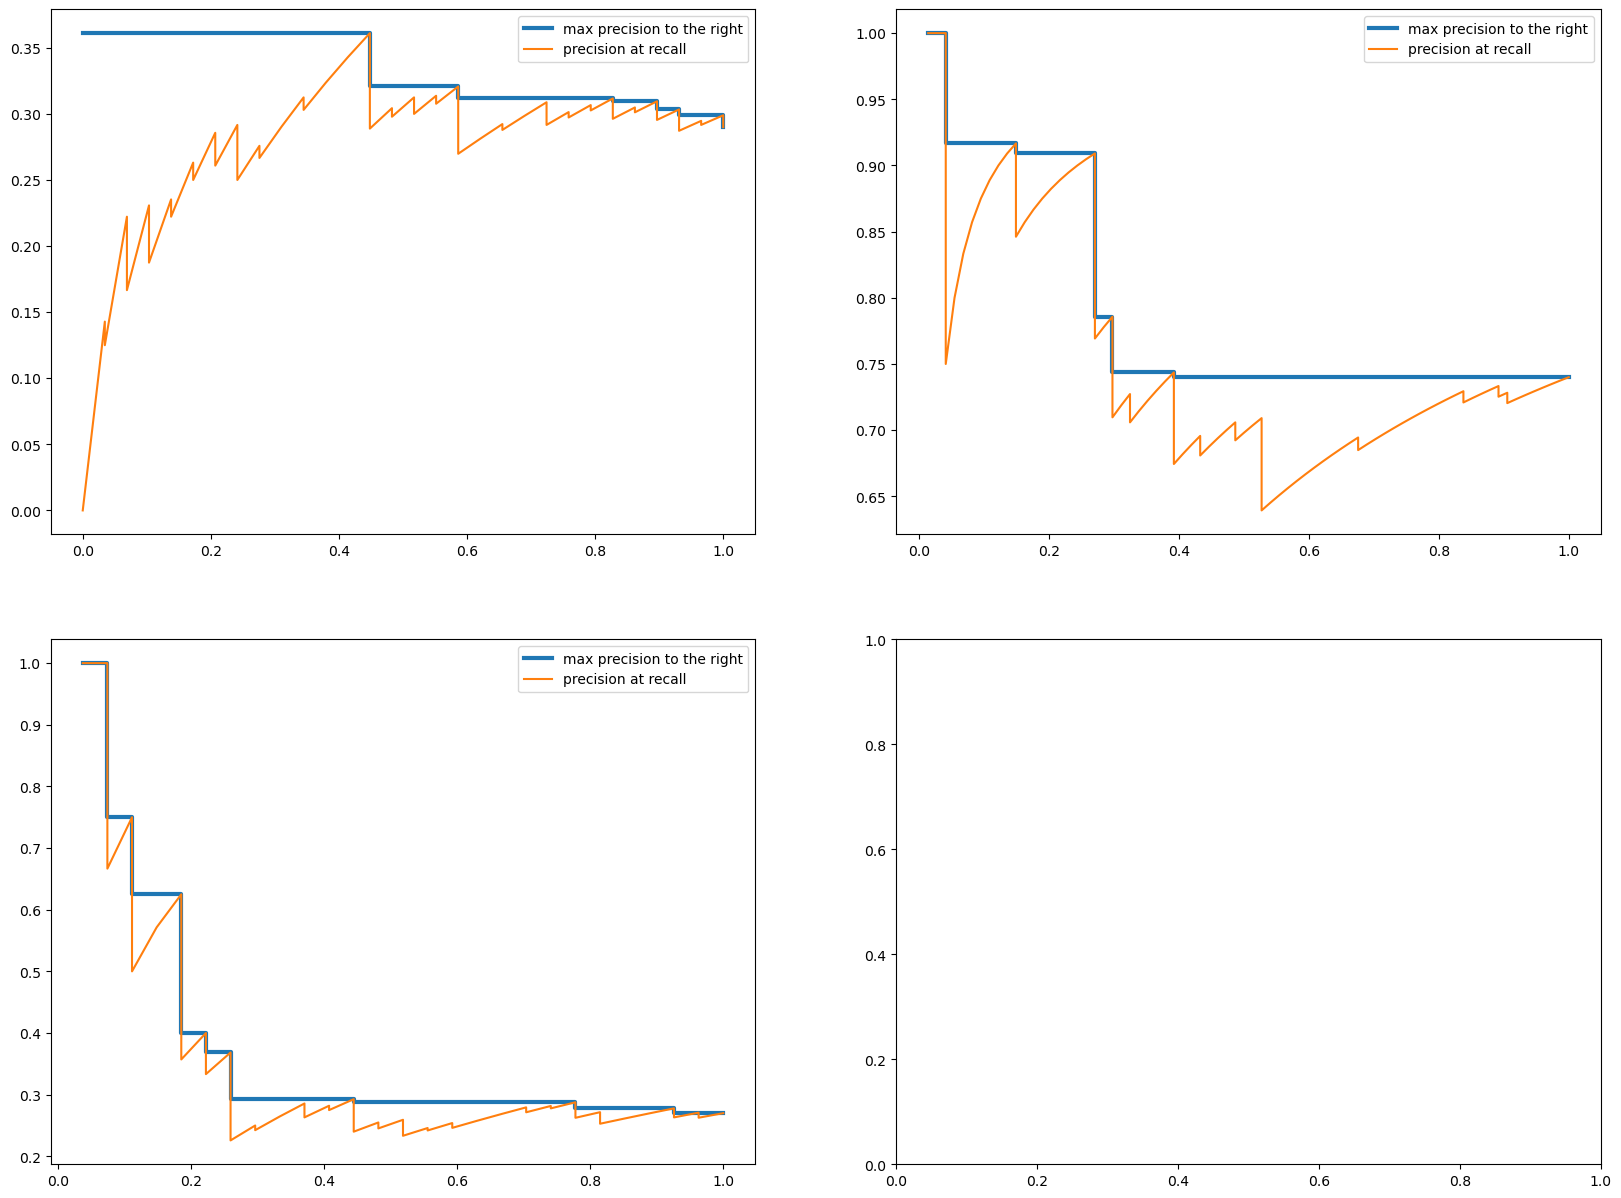

In [53]:
index_test = 2
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))
axs[0,0].plot(r[index_test], p_max[index_test], label='max precision to the right', linewidth=3)
axs[0,0].plot(r[index_test], p[index_test], label='precision at recall')
axs[0,0].legend()
axs[0,1].plot(r1[index_test], p1_max[index_test],  label='max precision to the right', linewidth=3)
axs[0,1].plot(r1[index_test], p1[index_test], label='precision at recall' )
axs[0,1].legend()
axs[1,0].plot(r2[index_test], p2_max[index_test],  label='max precision to the right', linewidth=3)
axs[1,0].plot(r2[index_test], p2[index_test], label='precision at recall')
axs[1,0].legend()
plt.show()

In the figure above we plot for a single querie how looks the precision-recall using precision and max precision to the right with differente features.

In the next plot we can see the mean of precision-recall plots in all the queries using the max precision to the right.

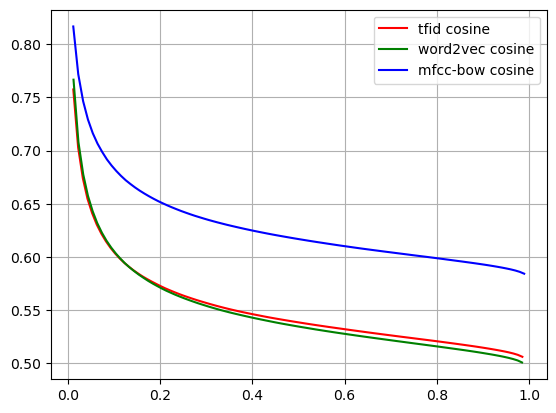

In [31]:
plt.plot(np.mean(r, axis=0), np.mean(p_max, axis=0), color='r', label='tfid cosine')
plt.plot(np.mean(r1, axis=0), np.mean(p1_max, axis=0), color='g', label='word2vec cosine')
plt.plot(np.mean(r2, axis=0), np.mean(p2_max, axis=0), color='b', label='mfcc-bow cosine')
plt.grid()
plt.legend()
plt.show()

In [29]:
if (exists(file_cosine_mean_precision_datasets) and  exists(file_cosine_mean_recall_datasets) and exists(file_cosine_maxprecision_precision_datasets)):
    cosine_P = pd.read_csv(file_cosine_mean_precision_datasets, index_col=0).to_numpy()
    cosine_R = pd.read_csv(file_cosine_mean_recall_datasets, index_col=0).to_numpy()
    cosine_P_max = pd.read_csv(file_cosine_maxprecision_precision_datasets, index_col=0).to_numpy()
else:
    i = 0
    cosine_P = np.zeros((len(cosine_df.items()), 100))
    cosine_R = np.zeros((len(cosine_df.items()), 100))
    cosine_P_max = np.zeros((len(cosine_df.items()), 100))
    for value in cosine_df.values():
        cosine_P[i], cosine_R[i], cosine_P_max[i] = Precision(value, 100, True)
        i += 1  
    
    pd.DataFrame(cosine_P, index=cosine_df.keys()).to_csv(file_cosine_mean_precision_datasets)
    pd.DataFrame(cosine_R, index=cosine_df.keys()).to_csv(file_cosine_mean_recall_datasets)
    pd.DataFrame(cosine_P_max, index=cosine_df.keys()).to_csv(file_cosine_maxprecision_precision_datasets)

In [30]:
if (exists(file_jaccard_mean_precision_datasets) and  exists(file_jaccard_mean_recall_datasets) and exists(file_jaccard_maxprecision_precision_datasets)):
    jaccard_P = pd.read_csv(file_jaccard_mean_precision_datasets, index_col=0).to_numpy()
    jaccard_R = pd.read_csv(file_jaccard_mean_recall_datasets, index_col=0).to_numpy()
    jaccard_P_max = pd.read_csv(file_jaccard_maxprecision_precision_datasets, index_col=0).to_numpy()
else:
    i = 0
    jaccard_P = np.zeros((len(jaccard_df.items()), 100))
    jaccard_R = np.zeros((len(jaccard_df.items()), 100))
    jaccard_P_max = np.zeros((len(jaccard_df.items()), 100))
    for value in jaccard_df.values():
        jaccard_P[i], jaccard_R[i], jaccard_P_max[i] = Precision(value, 100, True)
        i += 1  
    
    pd.DataFrame(jaccard_P, index=jaccard_df.keys()).to_csv(file_jaccard_mean_precision_datasets)
    pd.DataFrame(jaccard_R, index=jaccard_df.keys()).to_csv(file_jaccard_mean_recall_datasets)
    pd.DataFrame(jaccard_P_max, index=jaccard_df.keys()).to_csv(file_jaccard_maxprecision_precision_datasets)

Text(0.5, 0.98, 'Comparison between Precision-Recall using Cosine and Jaccard Similarity')

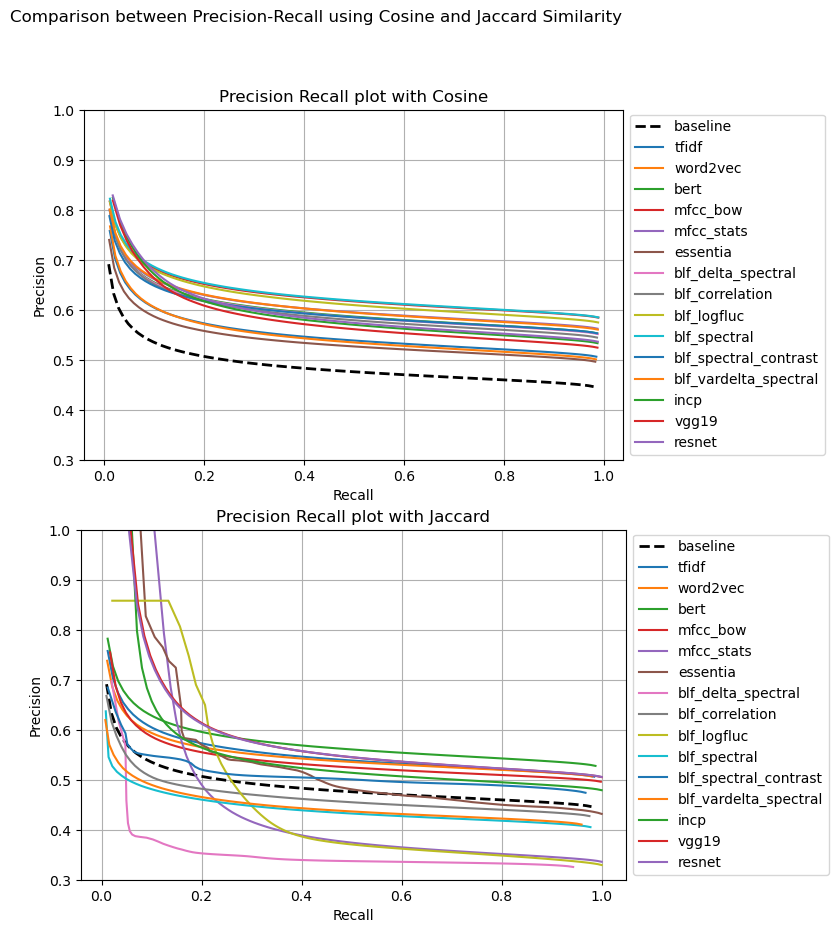

In [33]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(30, 10))

for i,key in enumerate(cosine_df.keys()):
    if (key == 'baseline'):
        axs[0].plot(cosine_R[i], cosine_P_max[i], label=key, linestyle='dashed', color='black', linewidth=2)
    else:
        axs[0].plot(cosine_R[i], cosine_P_max[i], label=key)

axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision Recall plot with Cosine")  # Add a title to the axes.
axs[0].set_aspect('equal')
axs[0].set_ylim(0.3,1) 
# ax.set_xlim(0,1) 
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i,key in enumerate(jaccard_df.keys()):
    if (key == 'baseline'):
        axs[1].plot(jaccard_R[i], jaccard_P_max[i], label=key, linestyle='dashed', color='black', linewidth=2)
    else:
        axs[1].plot(jaccard_R[i], jaccard_P_max[i], label=key)

axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].set_title("Precision Recall plot with Jaccard")  # Add a title to the axes.
axs[1].set_aspect('equal')
axs[1].set_ylim(0.3,1) 
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle('Comparison between Precision-Recall using Cosine and Jaccard Similarity')

## Comparing between lyrics, audio and video

Text(0.5, 0.98, 'Comparison between Lyrics, Audio and Video Using Jaccard Similariy')

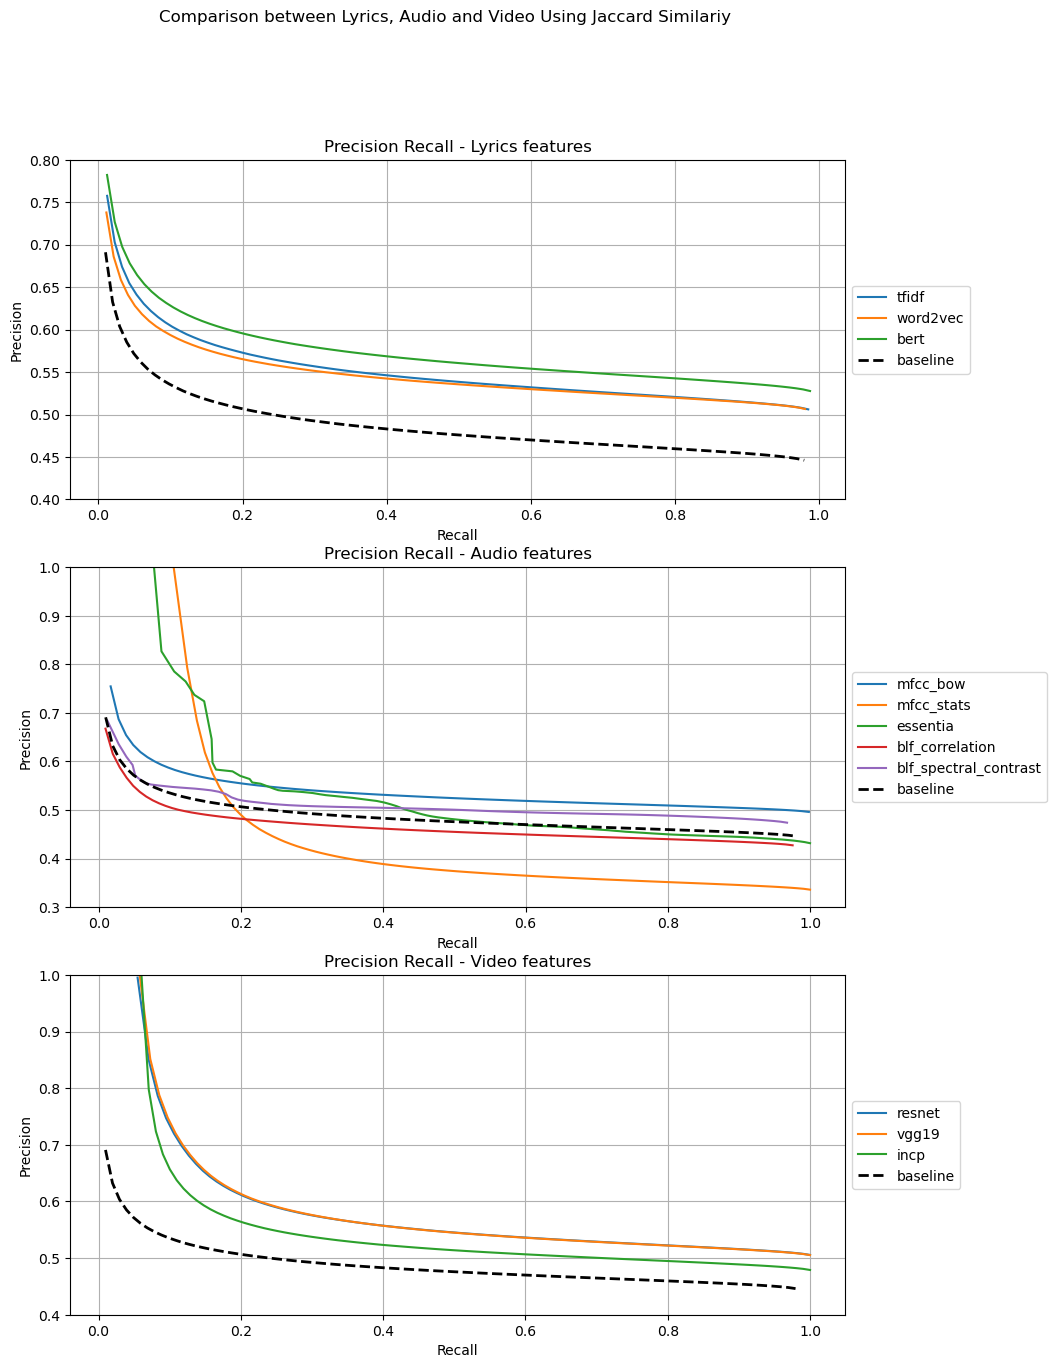

In [41]:
labels = list(jaccard_df.keys())
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

for i in range(1,4):
    axs[0].plot(jaccard_R[i], jaccard_P_max[i], label=labels[i])
axs[0].plot(jaccard_R[0], jaccard_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs[0].set_ylim(0.4,0.8) 
# axs[0].set_xlim(0,1) 
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision Recall - Lyrics features")

not_include = ["blf_delta_spectral", "blf_spectral", "blf_vardelta_spectral", "blf_logfluc"]
for i in range(1,10):
    if(labels[3+i]  not in not_include):
        axs[1].plot(jaccard_R[3+i], jaccard_P_max[3+i], label=labels[3+i])
axs[1].plot(jaccard_R[0], jaccard_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs[1].set_ylim(0.3,1) 
# axs[1].set_xlim(0,1) 
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].set_title("Precision Recall - Audio features")
    
for i in range(3):
    axs[2].plot(jaccard_R[-1-i], jaccard_P_max[-1-i], label=labels[-1-i])
axs[2].plot(jaccard_R[0], jaccard_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs[2].set_ylim(0.4,1) 
# axs[2].set_xlim(0,1) 
axs[2].grid(True)
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel("Recall")
axs[2].set_ylabel("Precision")
axs[2].set_title("Precision Recall - Video features")

fig.suptitle('Comparison between Lyrics, Audio and Video Using Jaccard Similariy')

Text(0.5, 0.98, 'Comparison between Lyrics, Audio and Video using Cosine Similarity')

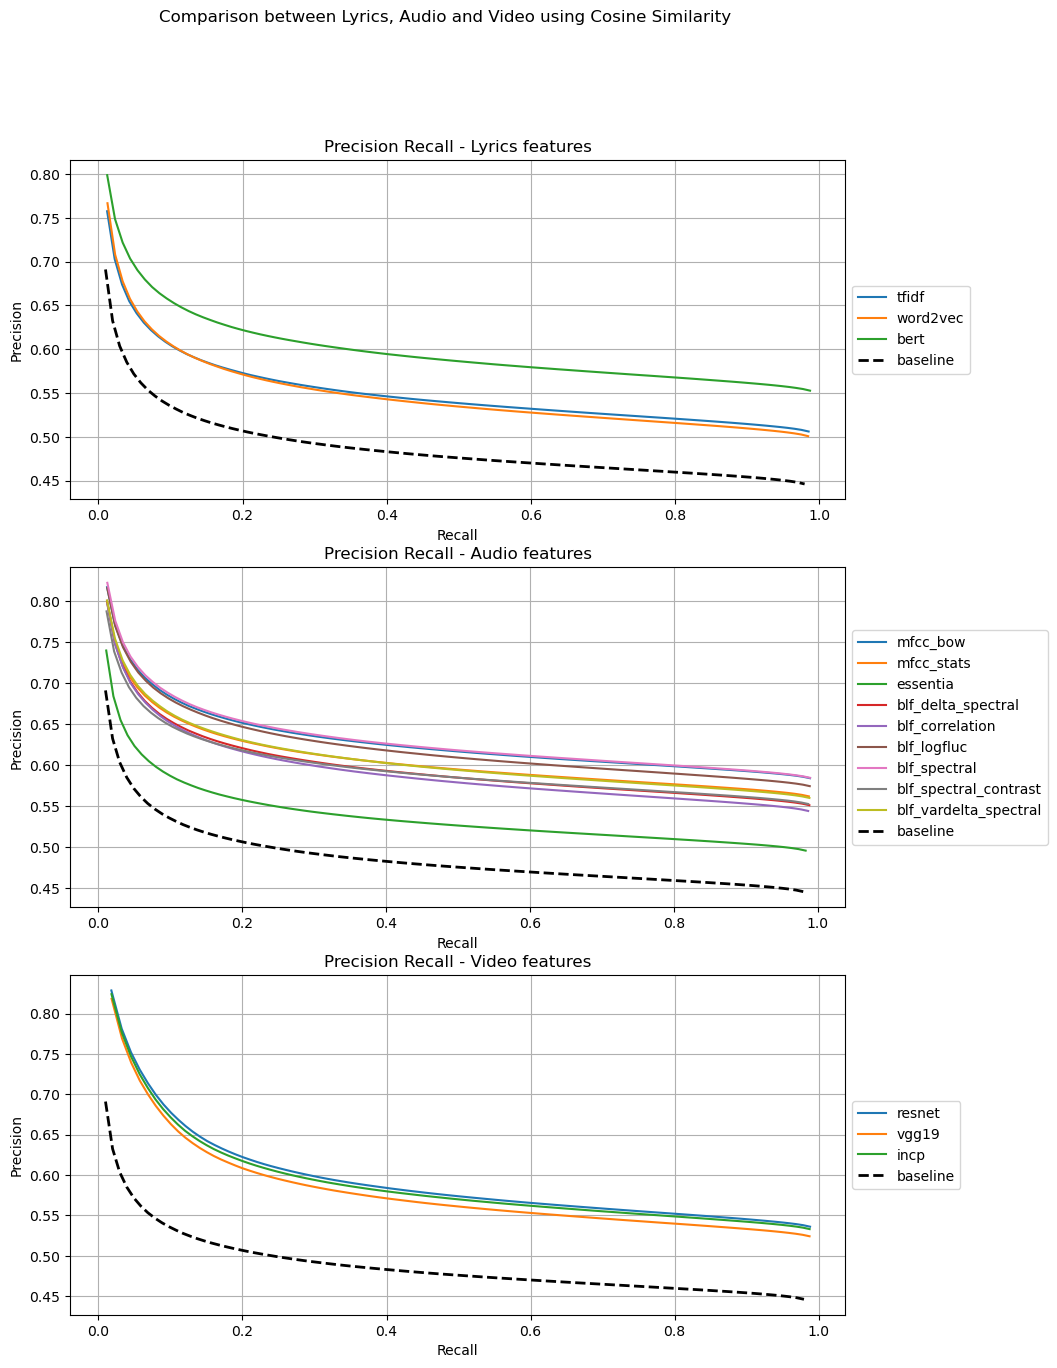

In [42]:
labels = list(cosine_df.keys())
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

for i in range(1,4):
    axs[0].plot(cosine_R[i], cosine_P_max[i], label=labels[i])
axs[0].plot(cosine_R[0], cosine_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
# axs[0].set_ylim(0.3,1) 
# axs[0].set_xlim(0,1) 
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision Recall - Lyrics features")

for i in range(1,10):
    axs[1].plot(cosine_R[3+i], cosine_P_max[3+i], label=labels[3+i])
axs[1].plot(cosine_R[0], cosine_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
# axs[1].set_ylim(0.3,1) 
# axs[1].set_xlim(0,1) 
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].set_title("Precision Recall - Audio features")
    
for i in range(3):
    axs[2].plot(cosine_R[-1-i], cosine_P_max[-1-i], label=labels[-1-i])
axs[2].plot(cosine_R[0], cosine_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
# axs[2].set_ylim(0.5,1) 
# axs[2].set_xlim(0,1) 
axs[2].grid(True)
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel("Recall")
axs[2].set_ylabel("Precision")
axs[2].set_title("Precision Recall - Video features")

fig.suptitle('Comparison between Lyrics, Audio and Video using Cosine Similarity')

Text(0.5, 1.0, 'Precision Recall - Best features with Cosine')

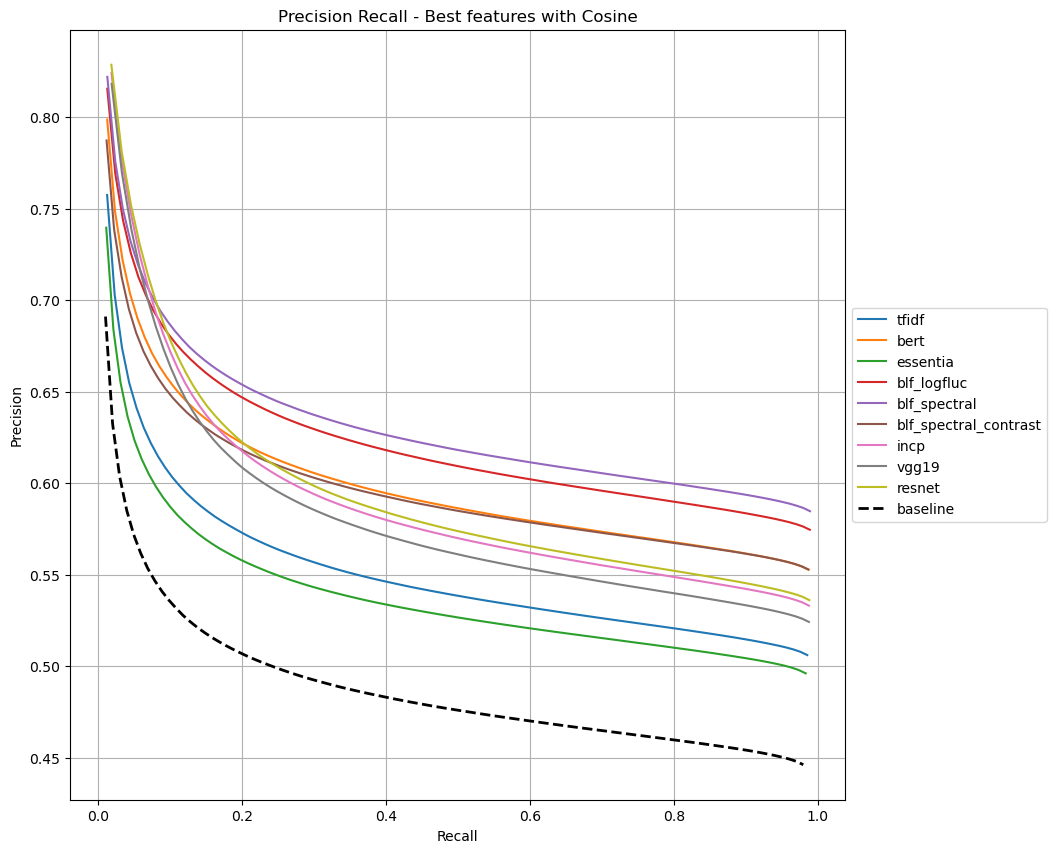

In [43]:
labels = list(cosine_df.keys())
fig, axs = plt.subplots( figsize=(10, 10))

include = ["bert", "tfidf", "blf_spectral",  "blf_spectral_contrast", "blf_logfluc","vgg19", "incp", "essentia", "resnet"]
for i in range(len(labels)):
    if(labels[i]  in include):
        axs.plot(cosine_R[i], cosine_P_max[i], label=labels[i])
axs.plot(cosine_R[0], cosine_P_max[0], label='baseline', linestyle='dashed', color='black', linewidth=2)
axs.grid(True)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs.set_xlabel("Recall")
axs.set_ylabel("Precision")
axs.set_title("Precision Recall - Best features with Cosine")

## Stability of top-k rankings between the retrieval algorithms

There is a function in scipy.stats that computes the kendall tau correlation.
However we founded the problem that this correlation works with sorting the values of the list and from there gets the concordant and discordant pair of values.

The problem is that we have for each query the id as string, and not numbers assigned to the ranks. And the scipy kendall tau function works trough sorting, so when sorting values it was taking in account the first letters of the id and not the rank.

Because of that,  we create a function that computes the kendall tau correlation given the top100 values for the same query in  2 differente features.

Creating for each list all the possible pair of values, and then extracting from it the concordant pairs to calculate the Kendall Tau correlation as defined in Modern Information and Retrieval, Ricardo Baeza-Yates, Berthier Ribeiro-Neto, 2nd Edition, pp.156

$$
    \tau = 1 -  \frac{2\Delta(R_1, R_2)}{K(K-1)}
$$


Where 
- $\Delta(R_1, R_2)$,  the number of discordant pairs in two rankings $R_1, R_2$
    
- $K$, the size of the ranking

In [61]:
def intersection(lst1, lst2):
    # Use of hybrid method
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3

In [62]:
def tauKendall(r1,r2, K):
    possible_pairs_r1 = [(a, b) for idx, a in enumerate(r1) for b in r1[idx + 1:]]
    possible_pairs_r2 = [(a, b) for idx, a in enumerate(r2) for b in r2[idx + 1:]]
    concordant_pairs = intersection(possible_pairs_r1, possible_pairs_r2)
    # 2 times size of concordant pairs because they are repeated in the two rankings
    delta = (K*(K-1)) - (len(concordant_pairs)*2)
    tau = 1 - ((2*delta) / (K*(K-1)))
    return tau

In [63]:
# Tesst with numbers in a list
test_custom = tauKendall([1,2,3,4,5,6,7],[1,3,6,2,7,4,5],7)
test_scipy  = stats.kendalltau([1,2,3,4,5,6,7],[1,3,6,2,7,4,5])
print("Custom Kendall Tau", test_custom, "\nScipy Kendall Tau", test_scipy)

Custom Kendall Tau 0.4285714285714286 
Scipy Kendall Tau KendalltauResult(correlation=0.4285714285714286, pvalue=0.2388888888888889)


In [64]:
# Case of letters
test_custom = tauKendall(['dog','cat','mouse','bird'],['bird', 'mouse', 'cat','dog'],4)
test_scipy  = stats.kendalltau(['dog','cat','mouse','bird'],['bird', 'mouse', 'cat','dog'])
print("Custom Kendall Tau", test_custom, "\nScipy Kendall Tau", test_scipy)

Custom Kendall Tau -1.0 
Scipy Kendall Tau KendalltauResult(correlation=-0.3333333333333334, pvalue=0.75)


When using strings in lists, the Kendall Tau from scipy doesn't work anymore, because underneath is based on ordering and not counting concordant or discordant pairs like our custom one. That is why we need to use a custom one to get valid results

In [65]:
# List of possible queries
queries = top_jaccard_tfidf.index.values
print(queries.shape)

(68641,)


In [66]:
if (exists(file_corr_all_values_tau_cosine)) and (exists(file_correlations_cosine_tau)):
    correlations_cosine_tau = pd.read_csv(file_correlations_cosine_tau, index_col=0)
    corr_all_values_tau_cosine = pd.read_csv(file_corr_all_values_tau_cosine, index_col=0).to_numpy()
else:    
    correlations_cosine_tau = pd.DataFrame(index=cosine_df.keys(), columns=cosine_df.keys())
    df_cosine_list = list(cosine_df.keys())
    df_cosine_combinations_ = [(a, b) for idx, a in enumerate(df_cosine_list) for b in df_cosine_list[idx + 1:]]
    df_cosine_combinations =list(zip(df_cosine_list, df_cosine_list))
    df_cosine_combinations.extend(df_cosine_combinations_)
    corr_all_values_tau_cosine  = np.zeros((len(df_cosine_combinations), queries.shape[0]))
    print(corr_all_values_tau_cosine.shape)
    
    for i, (df1, df2) in tqdm(enumerate(possible_dataframe_list)):
        for idx,query in enumerate(queries):
            corr_all_values_tau_cosine[i, idx] = tauKendall(cosine_df[df1].loc[query].values, cosine_df[df2].loc[query].values, 100)
        correlations_cosine_tau.loc[df1, df2] = np.mean(corr_all_values_tau_cosine[i])
        
    correlations_cosine_tau.to_csv(file_correlations_cosine_tau)
    pd.DataFrame(corr_all_values_tau_cosine, index=possible_dataframe_list).to_csv(file_corr_all_values_tau_cosine)

In [67]:
correlations_cosine_tau

,tfidf,word2vec,bert,mfcc_bow,mfcc_stats,essentia,blf_delta_spectral,blf_correlation,blf_logfluc,blf_spectral,blf_spectral_contrast,blf_vardelta_spectral,incp,vgg19,resnet
tfidf,1.0,-0.961659,-0.995467,-0.999985,-0.999989,-0.999995,-0.999989,-0.999985,-0.999989,-0.999981,-0.999991,-0.999986,-0.999990,-0.999990,-0.999990
word2vec,NaN,1.000000,-0.989499,-0.999967,-0.999974,-0.999994,-0.999980,-0.999972,-0.999981,-0.999967,-0.999981,-0.999974,-0.999983,-0.999983,-0.999981
bert,NaN,NaN,1.000000,-0.999953,-0.999967,-0.999993,-0.999973,-0.999965,-0.999975,-0.999953,-0.999976,-0.999968,-0.999972,-0.999974,-0.999966
mfcc_bow,NaN,NaN,NaN,1.000000,-0.997123,-0.999813,-0.999649,-0.999549,-0.999822,-0.992859,-0.998384,-0.999786,-0.999934,-0.999935,-0.999927
mfcc_stats,NaN,NaN,NaN,NaN,1.000000,-0.999967,-0.999772,-0.999594,-0.999875,-0.999557,-0.999819,-0.999843,-0.999967,-0.999969,-0.999964
essentia,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999963,-0.999986,-0.999969,-0.999752,-0.999970,-0.999988,-0.999993,-0.999993,-0.999992
blf_delta_spectral,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999311,-0.997846,-0.999042,-0.999737,-0.999284,-0.999962,-0.999962,-0.999959
blf_correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999869,-0.999032,-0.999819,-0.999176,-0.999966,-0.999967,-0.999964
blf_logfluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999781,-0.999897,-0.999885,-0.999979,-0.999979,-0.999977
blf_spectral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.997942,-0.993414,-0.999930,-0.999929,-0.999927


In [68]:
if (exists(file_corr_all_values_tau_jaccard)) and (exists(file_correlations_jaccard_tau)):
    correlations_jaccard_tau = pd.read_csv(file_correlations_jaccard_tau, index_col=0)
    corr_all_values_tau_jaccard = pd.read_csv(file_corr_all_values_tau_jaccard, index_col=0).to_numpy()
else:
    print("Creating from zero")
    correlations_jaccard_tau = pd.DataFrame(index=jaccard_df.keys(), columns=jaccard_df.keys())
    df_jaccard_list = list(jaccard_df.keys())
    df_combinations_jaccard_ = [(a, b) for idx, a in enumerate(df_jaccard_list) for b in df_jaccard_list[idx + 1:]]
    df_combinations_jaccard =list(zip(df_jaccard_list, df_jaccard_list))
    df_combinations_jaccard.extend(df_combinations_jaccard_)
    corr_all_values_tau_jaccard  = np.zeros((len(df_combinations_jaccard), queries.shape[0]))
    print(corr_all_values_tau_jaccard.shape)  
    
    for i, (df1, df2) in tqdm(enumerate(df_combinations_jaccard)):
        for idx,query in enumerate(queries):
            corr_all_values_tau_jaccard[i, idx] = tauKendall(jaccard_df[df1].loc[query].values, jaccard_df[df2].loc[query].values, 100)
        correlations_jaccard_tau.loc[df1, df2] = np.mean(corr_all_values_tau_jaccard[i])
        
    correlations_jaccard_tau.to_csv(file_correlations_jaccard_tau)
    pd.DataFrame(corr_all_values_tau_jaccard, index=df_combinations_jaccard).to_csv(file_corr_all_values_tau_jaccard)

In [69]:
correlations_jaccard_tau

,tfidf,word2vec,bert,mfcc_bow,mfcc_stats,essentia,blf_delta_spectral,blf_correlation,blf_logfluc,blf_spectral,blf_spectral_contrast,blf_vardelta_spectral,incp,vgg19,resnet
tfidf,1.0,-0.966518,-0.995433,-0.999991,-0.999995,-0.999996,-0.999999,-0.999995,-0.999994,-0.999995,-0.999999,-0.999997,-0.999994,-0.999991,-0.999990
word2vec,NaN,1.000000,-0.997279,-0.999993,-0.999997,-0.999996,-1.000000,-0.999996,-0.999998,-0.999995,-1.000000,-0.999998,-0.999997,-0.999994,-0.999993
bert,NaN,NaN,1.000000,-0.999985,-0.999984,-0.999997,-0.999998,-0.999997,-0.999994,-0.999993,-0.999998,-0.999995,-0.999989,-0.999985,-0.999980
mfcc_bow,NaN,NaN,NaN,1.000000,-0.999692,-0.999995,-0.999950,-0.999990,-0.999601,-0.999829,-0.999950,-0.999979,-0.999925,-0.999881,-0.999885
mfcc_stats,NaN,NaN,NaN,NaN,1.000000,-0.999621,-0.999994,-0.999670,-0.986357,-0.990623,-0.999994,-0.999912,-0.999939,-0.999941,-0.999933
essentia,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,-0.998937,-0.997556,-0.999974,-1.000000,-1.000000,-0.999844,-0.999937,-0.999922
blf_delta_spectral,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999970,-1.000000,-0.999231,-0.999971,-0.998702,-1.000000,-0.999999,-0.999998
blf_correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.989813,-0.983221,-0.999970,-0.999954,-0.999996,-0.999996,-0.999997
blf_logfluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.973630,-1.000000,-0.999999,-0.999907,-0.999957,-0.999933
blf_spectral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999231,-0.998597,-0.999996,-0.999994,-0.999995


In [70]:
# # Alternative to replace id strings with numbers, but at the end is the same results with the new function

# dict_values = dict(zip(top_cosine_tfidf.index.values, list(range(68641))))

# top_cosine_word2vec_numbers = top_cosine_word2vec.copy()
# for query in tqdm(queries):
#     values = { x :dict_values[x]  for x in np.unique(top_cosine_word2vec_numbers.loc[query])}
#     top_cosine_word2vec_numbers.loc[query].replace(values, inplace=True)

    
    
# top_cosine_tfidf_numbers = top_cosine_tfidf.copy()
# for query in tqdm(queries):
#     values = { x :dict_values[x]  for x in np.unique(top_cosine_tfidf_numbers.loc[query])}
#     top_cosine_tfidf_numbers.loc[query].replace(values, inplace=True)

    
# corr_tau_cosine_tfidf_word2vec = np.zeros((queries.shape[0]))
# for idx,query in tqdm(enumerate(queries)):
#     corr_tau_cosine_tfidf_word2vec[idx] = tauKendall(top_cosine_tfidf_numbers.loc[query].values, top_cosine_word2vec_numbers.loc[query].values, 100)